### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data Visualization Libraries
import seaborn as sns # Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')  # to ignore warning

In [2]:
# to display all the necessary rows ( say 150)

pd.set_option("display.max_rows",1000)

### Load the Data

In [3]:
df = pd.read_csv('application_data.csv')

In [4]:
# display first 5 rows

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# display shape

df.shape

(307511, 122)

In [6]:
# display data type of all the variables

df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
l = list(df.columns)

In [8]:
for i in l:
    print(i, df[i].nunique())

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13672
AMT_GOODS_PRICE 1002
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 62
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 17
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114584
EXT_SOURCE_2 119831
EXT_SOURCE_3 814
APARTMENTS_AVG 2339
BASEMENTAREA_AVG 3780
YEARS_BEGINEXPLUATATION_AVG 285
YEARS_BUILD_AVG 149
COMMONARE

### Missing Values

In [9]:
# finding the percentage of misssing values in each column

df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [10]:
mv= df.isnull().mean().reset_index().rename(columns = {'index' : 'column name', 0 : 'missing value'})\
    .sort_values('missing value', ascending = False)
mv

,column name,missing value
76,COMMONAREA_MEDI,0.698723
48,COMMONAREA_AVG,0.698723
62,COMMONAREA_MODE,0.698723
70,NONLIVINGAPARTMENTS_MODE,0.694330
56,NONLIVINGAPARTMENTS_AVG,0.694330
84,NONLIVINGAPARTMENTS_MEDI,0.694330
86,FONDKAPREMONT_MODE,0.683862
68,LIVINGAPARTMENTS_MODE,0.683550
54,LIVINGAPARTMENTS_AVG,0.683550
82,LIVINGAPARTMENTS_MEDI,0.683550


In [11]:
# dropping all the columns whose percentage of missing value is greater than 45 

drop_cols = list(mv[mv['missing value'] > 0.45]['column name'])

df = df.drop(drop_cols, axis = 1)

In [12]:
df.shape

(307511, 73)

In [13]:
mv= df.isnull().mean().reset_index().rename(columns = {'index' : 'column name', 0 : 'missing value'})\
    .sort_values('missing value', ascending = False)
mv

,column name,missing value
27,OCCUPATION_TYPE,0.313455
41,EXT_SOURCE_3,0.198253
72,AMT_REQ_CREDIT_BUREAU_YEAR,0.135016
71,AMT_REQ_CREDIT_BUREAU_QRT,0.135016
70,AMT_REQ_CREDIT_BUREAU_MON,0.135016
69,AMT_REQ_CREDIT_BUREAU_WEEK,0.135016
68,AMT_REQ_CREDIT_BUREAU_DAY,0.135016
67,AMT_REQ_CREDIT_BUREAU_HOUR,0.135016
11,NAME_TYPE_SUITE,0.004201
42,OBS_30_CNT_SOCIAL_CIRCLE,0.003320


#### handling flag document variables

In [14]:
## droping all the flag document variables as we can see the inconsistency of the users in providing all the documents. 
## Other way to do is to create another column and store 1 if the user has provided all the docs else 0, nd then droping all the docs columns

docs = df.iloc[:, 47:67].columns

In [15]:
df = df.drop(docs, axis = 1)

In [16]:
df.shape

(307511, 53)

In [17]:
mv= df.isnull().mean().reset_index().rename(columns = {'index' : 'column name', 0 : 'missing value'})\
    .sort_values('missing value', ascending = False)

mv = mv[mv['missing value'] > 0]

mv

,column name,missing value
27,OCCUPATION_TYPE,0.313455
41,EXT_SOURCE_3,0.198253
52,AMT_REQ_CREDIT_BUREAU_YEAR,0.135016
51,AMT_REQ_CREDIT_BUREAU_QRT,0.135016
50,AMT_REQ_CREDIT_BUREAU_MON,0.135016
49,AMT_REQ_CREDIT_BUREAU_WEEK,0.135016
48,AMT_REQ_CREDIT_BUREAU_DAY,0.135016
47,AMT_REQ_CREDIT_BUREAU_HOUR,0.135016
11,NAME_TYPE_SUITE,0.004201
43,DEF_30_CNT_SOCIAL_CIRCLE,0.003320


#### handling missing values of 'OCCUPATION_TYPE' variable

In [18]:
df['OCCUPATION_TYPE'].nunique()

18

In [19]:
# since missing value of occupation type variable is approx 30%, imputing the missing values with unknown or other category
# would be the best approach

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('others')

In [20]:
df['OCCUPATION_TYPE'].isnull().sum()

0

#### handling missing values of 'EXT_SOURCE_3' variable

In [21]:
df['EXT_SOURCE_3'].nunique()

814

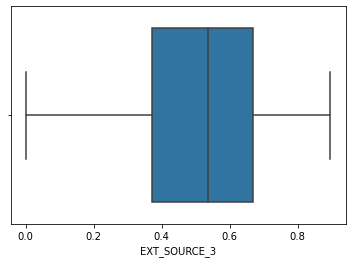

In [22]:
sns.boxplot(df['EXT_SOURCE_3'])
plt.show()

In [23]:
med = df['EXT_SOURCE_3'].median()
med

0.5352762504724826

In [24]:
# as a EXT_SOURCE3 is a continuous column and missing value % is 19, better approach is to impute the value with median 

df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(med)

In [25]:
df['EXT_SOURCE_3'].isnull().sum()

0

#### handling missing values of  AMT_REQ_CREDIT_BUREAU  variables

In [26]:
credit_bureau = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', \
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']

In [27]:
## as missing values define the non availabality of data about the client from credit bureau, its better to better to fill with np.NaN

for i in credit_bureau:
    df[i] = df[i].fillna(np.NaN)

In [28]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

#### handling missing values of NAME_TYPE_SUITE variables

In [29]:
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [30]:
# as it is a categorical column and missing vale is less than 15%, it is better to impute with mode

mode = df['NAME_TYPE_SUITE'].mode()[0]

In [31]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(mode)

In [32]:
df['NAME_TYPE_SUITE'].isnull().sum()

0

In [33]:
mv= df.isnull().mean().reset_index().rename(columns = {'index' : 'column name', 0 : 'missing value'})\
    .sort_values('missing value', ascending = False)

mv = mv[mv['missing value'] > 0]

mv

,column name,missing value
52,AMT_REQ_CREDIT_BUREAU_YEAR,0.135016
51,AMT_REQ_CREDIT_BUREAU_QRT,0.135016
50,AMT_REQ_CREDIT_BUREAU_MON,0.135016
49,AMT_REQ_CREDIT_BUREAU_WEEK,0.135016
48,AMT_REQ_CREDIT_BUREAU_DAY,0.135016
47,AMT_REQ_CREDIT_BUREAU_HOUR,0.135016
44,OBS_60_CNT_SOCIAL_CIRCLE,0.003320
43,DEF_30_CNT_SOCIAL_CIRCLE,0.003320
42,OBS_30_CNT_SOCIAL_CIRCLE,0.003320
45,DEF_60_CNT_SOCIAL_CIRCLE,0.003320


#### handling missing values of  SOCIAL CIRCLE variables

they are left as it is,  as information may not be available as client did not provide the details feeling it sensitive or could be any other reason also

In [34]:
df['EXT_SOURCE_2'].head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [35]:
df.shape

(307511, 53)

In [36]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### data types

In [37]:
# SK_ID_CURR column which is just a unique identifier and not considered for analysis

id_col = ['SK_ID_CURR']

df['SK_ID_CURR'] = df['SK_ID_CURR'].astype(object)

In [38]:
# categorical columns

cat_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', \
           'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',\
           'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',\
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']

In [39]:
# type casting the data of categorical columns from int / float to object type

for i in cat_col:
    df[i] = df[i].astype(object)

In [40]:
# rest are continous columns and are of int or float data type 

df.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                      object
FLAG_EMP_PHONE                  object
FLAG_WORK_PHONE                 object
FLAG_CONT_MOBILE                object
FLAG_PHONE               

### Outliers for Continuous columns

capping is done for all the variables to handle outliers as we need to analyse on those clients as well and derive insights

#### handling outliers for AMT_INCOME_TOTAL variable

In [41]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

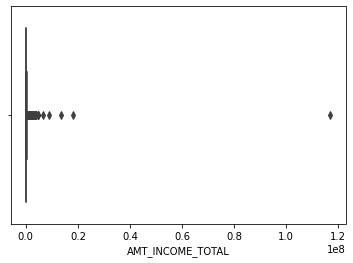

In [42]:
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

In [43]:
# capping the values

q1 = 1.125000e+05
q3 = 2.025000e+05
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-22500.0 337500.0


In [44]:
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL'] > upper_bound, upper_bound, df['AMT_INCOME_TOTAL'])

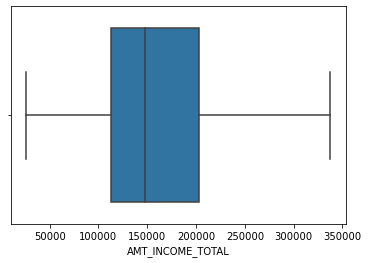

In [45]:
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

#### handling outliers for AMT_CREDIT variable

In [46]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

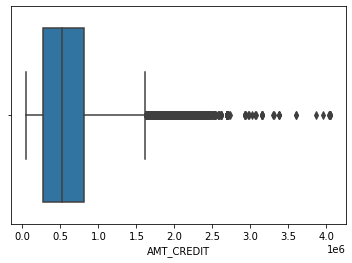

In [47]:
sns.boxplot(df['AMT_CREDIT'])
plt.show()

In [48]:
# finding upper_bound and lower_bound using IQR

q1 = 2.700000e+05
q3 = 8.086500e+05
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-537975.0 1616625.0


In [49]:
df['AMT_CREDIT'] = np.where(df['AMT_CREDIT'] > upper_bound, upper_bound, df['AMT_CREDIT'])

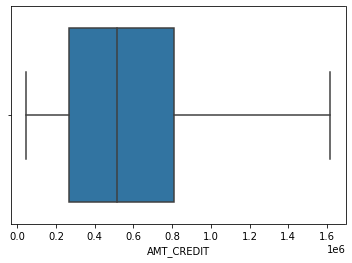

In [50]:
sns.boxplot(df['AMT_CREDIT'])
plt.show()

#### handling outliers for AMT_ANNUITY variable

In [51]:
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

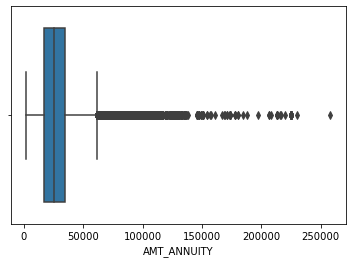

In [52]:
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

In [53]:
q1 = 16524
q3 = 34596
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-10584.0 61704.0


In [54]:
df['AMT_ANNUITY'] = np.where(df['AMT_ANNUITY'] > upper_bound, upper_bound, df['AMT_ANNUITY'])

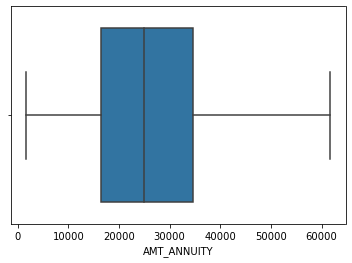

In [55]:
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

#### handling outliers for AMT_GOODS_PRICE variable

In [56]:
df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

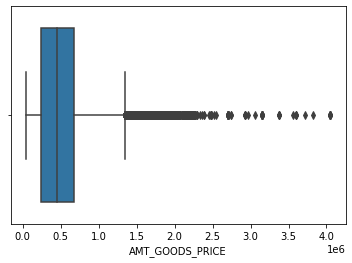

In [57]:
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

In [58]:
q1 = 2.385000e+05
q3 = 6.795000e+05
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-423000.0 1341000.0


In [59]:
df['AMT_GOODS_PRICE'] = np.where(df['AMT_GOODS_PRICE'] > upper_bound, upper_bound, df['AMT_GOODS_PRICE'])

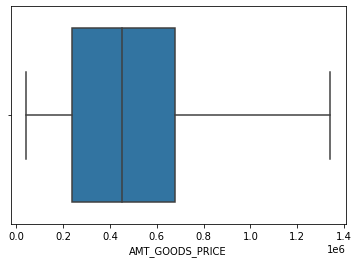

In [60]:
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

### Binning

#### binning the AMT_INCOME_TOTAL variable

In [61]:
df['Income_Level'] = pd.qcut(df['AMT_INCOME_TOTAL'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['VL', 'L', 'M', 'H', 'VH'])

#### binning the  AMT_CREDIT variable

In [62]:
df['Credit_Level'] = pd.qcut(df['AMT_CREDIT'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['VL', 'L', 'M', 'H', 'VH'])

#### binning the AMT_GOODS_PRICE variable

In [63]:
df['Goods_Price_Level'] = pd.qcut(df['AMT_GOODS_PRICE'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['VL', 'L', 'M', 'H', 'VH'])

In [64]:
# we can see that 3 columns that we have created are added to the data

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,VL,VL
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,L,L,L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,L,M,M


## Univariate Analysis

By now, we have already done univariate analysis for some variables ( plotted boxplots to handle outliers)

Lets analyse some more of the variables

### Categorical Unordered Univariate Analysis

#### Analysis of TARGET variable

In [65]:
df['TARGET'].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

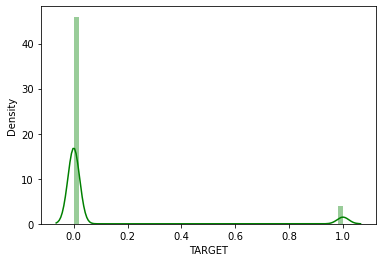

In [66]:
sns.distplot(df['TARGET'], color = 'g')
plt.show()

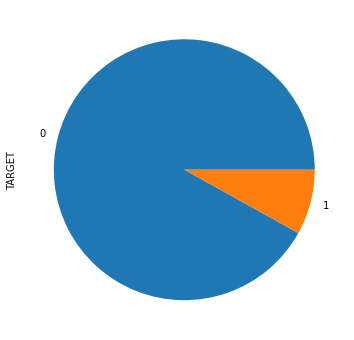

In [67]:
# we can depict from the chart that minority (about 8% of the people have payment difficulties and it is good to not lend
# loan to those people, lets analyse deeply in further analysis)

df['TARGET'].value_counts(normalize = True).plot.pie(figsize = [6,6])
plt.show()

df.dtypes

#### Analysis of OCCUPATION_TYPE variable

In [68]:
df['OCCUPATION_TYPE'].value_counts(normalize = True)

others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

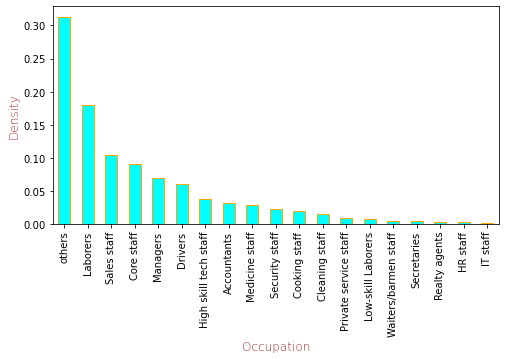

In [69]:
df['OCCUPATION_TYPE'].value_counts(normalize = True).plot.bar(figsize = [8,4], color = 'cyan', edgecolor = 'orange')

plt.xlabel('Occupation', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

# occupation of almost 30% of the people are others (the variable which we created for missing values),
# other than that laborers who may need money to make their life better have applied for the loan (19%) 
# and IT staff people whohave applied for the loan is tool less 

#### Analysis of NAME_EDUCATION_TYPE variable

In [70]:
 df['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

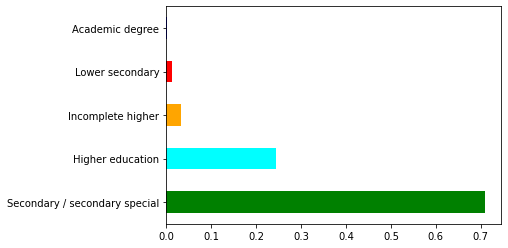

In [71]:
df['NAME_EDUCATION_TYPE'].value_counts(normalize = True).plot.barh(color = ['green', 'cyan', 'orange', 'red', 'blue'])
plt.show()

# almost 70% of clients who have applied for the loan fall under secondary / secondary special secondary. However significant
# number os users have completed Higher education (say 25%)

#### Analysis of  NAME_HOUSING_TYPE variable

In [72]:
df['NAME_HOUSING_TYPE'].value_counts(normalize = True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

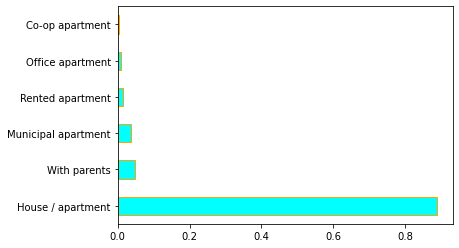

In [73]:
df['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.barh(color = 'cyan', edgecolor = 'orange')
plt.show()

# majority of clients live in house / apartment (close to 90%) whereas few live in office apartment (say about 1%)

### Categorical Ordered Univariate Analysis

#### Analysis of Income Level variable

In [74]:
df['Income_Level'].value_counts(normalize = True)

L     0.278871
H     0.245562
VL    0.207053
VH    0.153224
M     0.115290
Name: Income_Level, dtype: float64

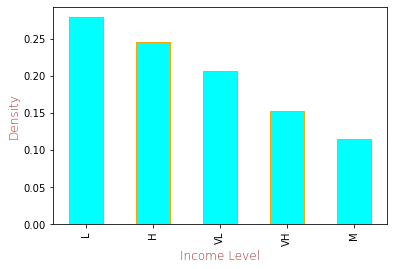

In [75]:
df['Income_Level'].value_counts(normalize = True).plot.bar(color = 'cyan', edgecolor = 'orange')

plt.xlabel('Income Level', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.ylabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

# from this analysis, we can see that about 27% of people belongs to low category of income. Interesting factor is that very less
# people belogs the medium category (11%). Almost 15% of client belongs to VH category

#### Analysis of Credit Level variable

In [76]:
df['Credit_Level'].value_counts(normalize = True)

VL    0.211131
H     0.208201
M     0.200162
VH    0.191577
L     0.188930
Name: Credit_Level, dtype: float64

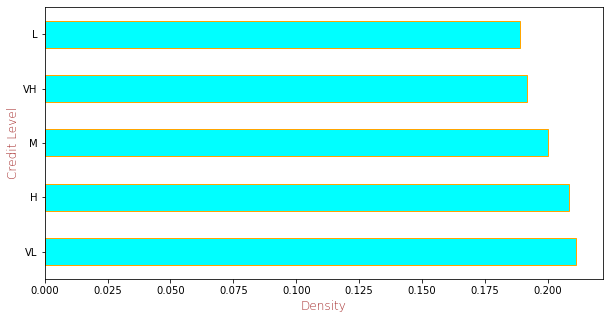

In [77]:
df['Credit_Level'].value_counts(normalize = True).plot.barh(color = 'cyan', edgecolor = 'orange', figsize = [10, 5])

plt.ylabel('Credit Level', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.xlabel('Density', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

# here we can see that,  credit level category are almost equally distributed

### Bivariate and Multivariate Analysis

### Numeric- numeric analysis

In [78]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,VL,VL
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,L,L,L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,L,M,M


In [79]:
df.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_WORK_PHONE                  object
FLAG_CONT_MOBILE                 object


#### Analysis of income and credit variable

<Figure size 360x360 with 0 Axes>

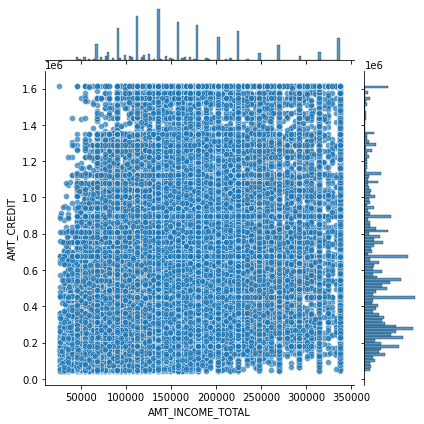

In [80]:
plt.figure(figsize = [5,5])

sns.jointplot(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'], alpha = 0.7)
plt.show()

# interesting analysis is that client who have high income have asked for low level of credit whereas clients whith low income
# have even asked for high credit (therefore, values are distributed all over the region)

#### Analysis of income and goods_price variable

<Figure size 360x360 with 0 Axes>

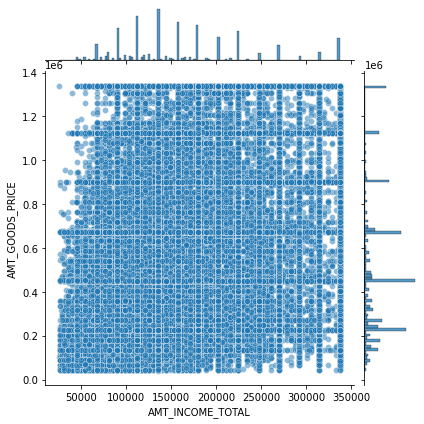

In [81]:
plt.figure(figsize = [5,5])

sns.jointplot(df['AMT_INCOME_TOTAL'], df['AMT_GOODS_PRICE'], alpha = 0.5)
plt.show()

# we can see the same analysis as we can see earlier

#### Analysis of numeric - numeric variables at a time using pairplot

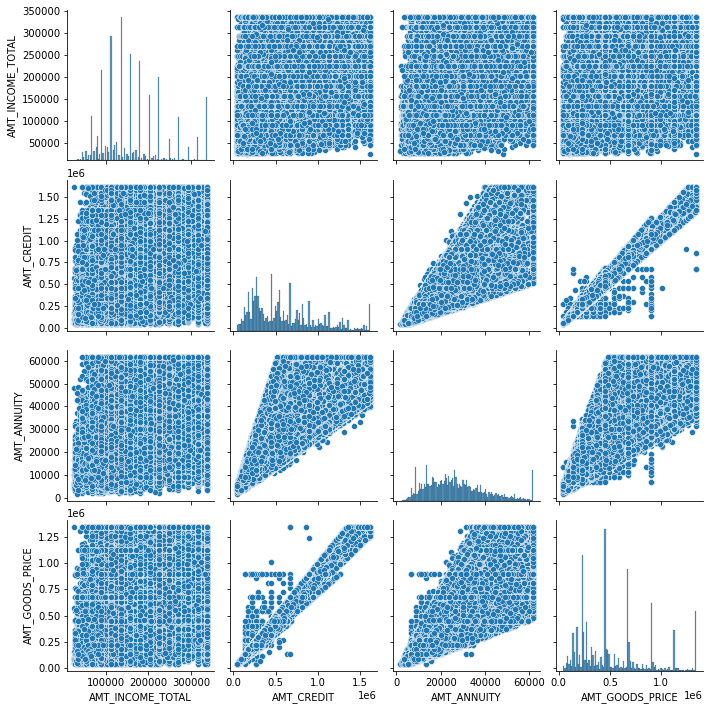

In [82]:
sns.pairplot(data = df, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])

# left diagonal show the histograms of the 2 variables, we can see that there is a linear relationship between credit 
# and good price as higher the good price, here the credits claimed for

#### Correlation heat map

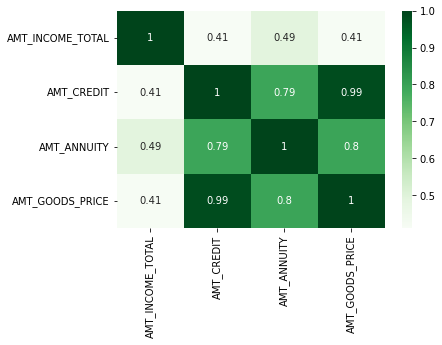

In [83]:
sns.heatmap(data = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot = True, cmap = 'Greens')
plt.show()

# Having said that in pair plot, there is a high correlation between credit and goods_price variable, 
# annuity also have good correlation with credit and good_price, and others being the low correlation

### Numerical - Categorical Analysis

#### Income vs Target 

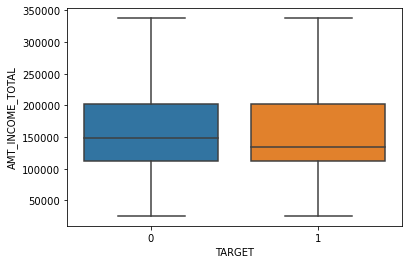

In [84]:
sns.boxplot(data = df, x = 'TARGET', y = 'AMT_INCOME_TOTAL')
plt.show()

# upper bound and lower, and 25 and 75 percentile are almost similar for both target variable 0 and 1. 
# However median is quite liss for target variable 1

#### Annuity vs Target

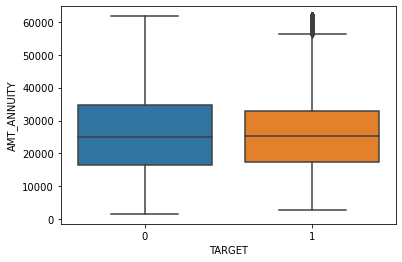

In [85]:
sns.boxplot(data = df, x = 'TARGET', y = 'AMT_ANNUITY')
plt.show()

#### Credit vs Target

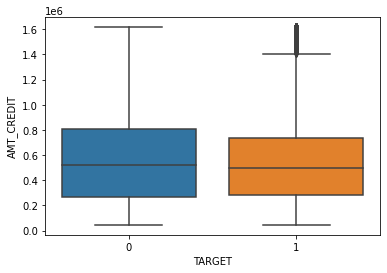

In [86]:
sns.boxplot(data = df, x = 'TARGET', y = 'AMT_CREDIT')
plt.show()

# similar analysis is done on other variables and the insights are noted

In [87]:
#groupby the target to find the mean of the annnuity with response no & yes seperatly.

In [88]:
df.groupby('TARGET')['AMT_CREDIT'].mean()

TARGET
0    595634.086064
1    554495.753656
Name: AMT_CREDIT, dtype: float64

In [89]:
df.groupby('TARGET')['AMT_CREDIT'].median()

TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64

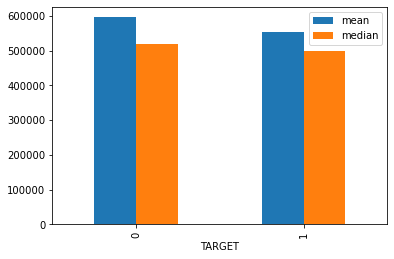

In [90]:
df.groupby('TARGET')['AMT_CREDIT'].aggregate(['mean', 'median']).plot.bar()
plt.show()

#### External Source vs Target

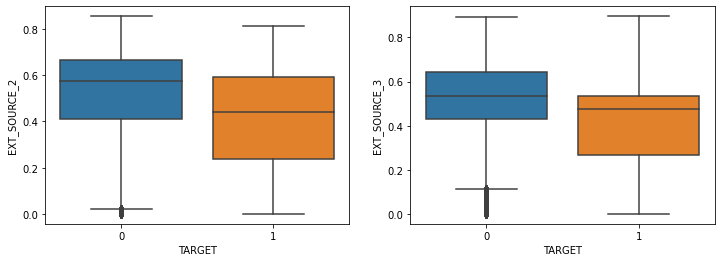

In [91]:
plt.figure(figsize = [12, 4])

plt.subplot(1,2,1)

sns.boxplot(data = df, x = 'TARGET', y = 'EXT_SOURCE_2')

plt.subplot(1,2,2)

sns.boxplot(data = df, x = 'TARGET', y = 'EXT_SOURCE_3')

plt.show()

# we can conclude that the clients who have high normalized score from both external source 2 and 3 are likely to repay the loan

#### Bureau enueries per year vs Target

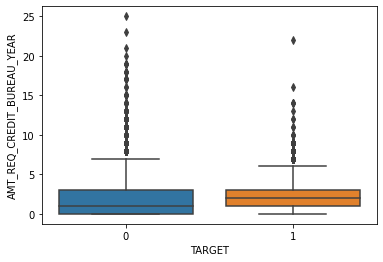

In [92]:
sns.boxplot(data = df, x = 'TARGET', y = 'AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

# we can significantly witness the outliers

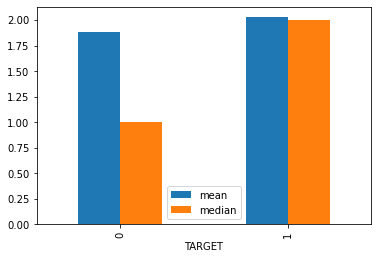

In [93]:
df.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_YEAR'].aggregate(['mean', 'median']).plot.bar()
plt.show()

# this graph makes sense because the client who have minimal bureau enquiries are considered to be more likely to target.
# there is a significant difference between mean and median as outliers are present

#### Family Members vs Target

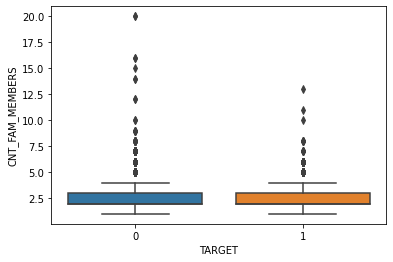

In [94]:
sns.boxplot(data = df, x = 'TARGET', y = 'CNT_FAM_MEMBERS')
plt.show()

# we can significantly witness the outliers

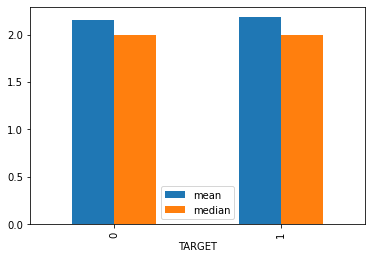

In [95]:
df.groupby('TARGET')['CNT_FAM_MEMBERS'].aggregate(['mean', 'median']).plot.bar()
plt.show()

# we can conclude that the count of family members doesnt affect much the target variable (therefore we can ignore the column)

#### income vs education 

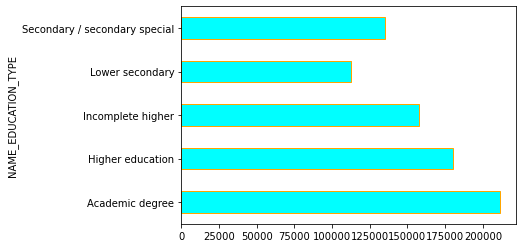

In [96]:
df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].median().plot.barh(color = 'cyan', edgecolor = 'orange')
plt.show()

# it makes sense that Academic degree people have the highest income whereas lower secondary being the least

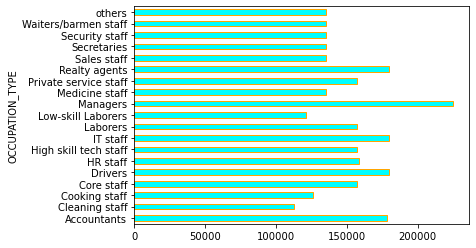

In [97]:
df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].median().plot.barh(color = 'cyan', edgecolor = 'orange')
plt.show()

# we know that managers are being paid nicely and this graph depicts that whereas low-skill labourers being the least

### Categorical - Categorical Analysis

In [98]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [99]:
df['TARGET'].mean()

0.08072881945686496

In [100]:
df['TARGET'].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### Education vs Target

In [101]:
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

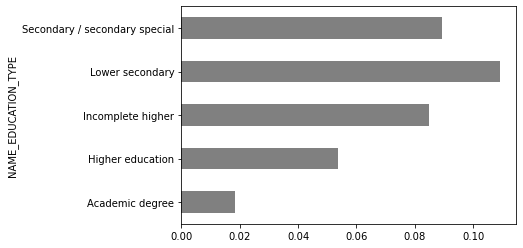

In [102]:
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.barh(color = 'gray')
plt.show()

# clients whose education background is just lower secondary are likely to be default (late payments) and therefore, 
# it is better to not get into those clients

#### Occupation vs Target

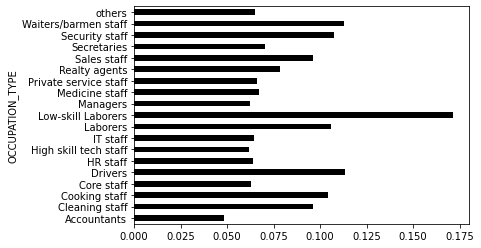

In [103]:
df.groupby('OCCUPATION_TYPE')['TARGET'].mean().plot.barh(color = 'k')
plt.show()

# Having said that, we can have a clear picture that the pupil who have completed just lower secondary education are likely
# to get into low skill labourers or labourers are have high chance of defaulted payment. 

#### Housing vs Target

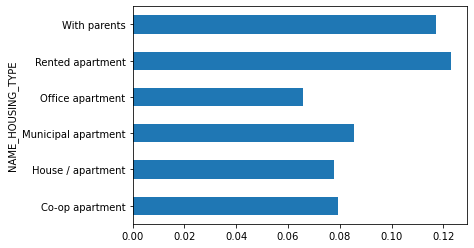

In [104]:
df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot.barh()
plt.show()

# clients who live in office appartment are likely to repay the loan as they have sufficient income dont have to worry 
# about the rent of the apartment. Clients who live with parents ad rented apartments are assosciated with high risk fctors

####  Income type vs Target 

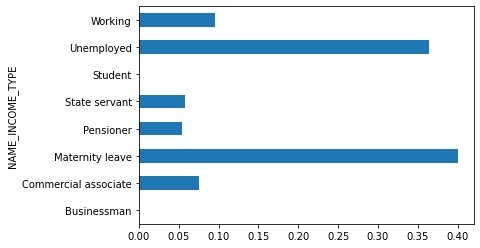

In [105]:
df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.barh()
plt.show()

# its clear that clients who on maternity leave and unemployed have high risk factors 
# whereas state servant and pensioner being the least

#### Organisation type vs Target

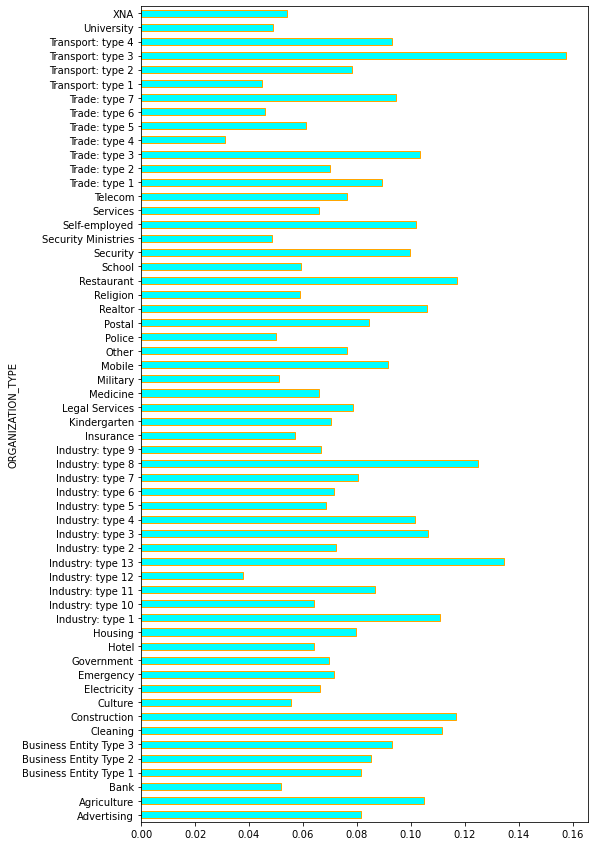

In [106]:
plt.figure(figsize = [8, 15])

df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().plot.barh(color = 'cyan', edgecolor = 'orange')
plt.show()

#### Family status vs Target

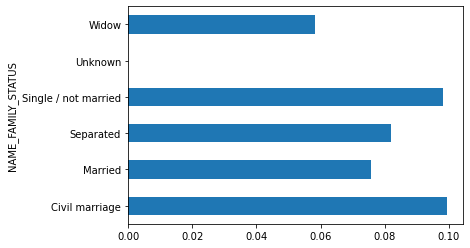

In [107]:
df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.barh()
plt.show()

#### Phone vs Target

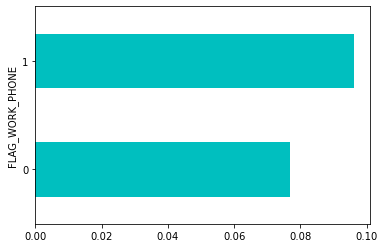

In [108]:
df.groupby('FLAG_WORK_PHONE')['TARGET'].mean().plot.barh(color = 'c')
plt.show()

# from the graph, its clear that to check whether the clients is working or not during the proccess

#### Analysis of all the regions variable vs Target

In [109]:
region_cols = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', \
               'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

for i in region_cols:
    df[i] = df[i].apply(lambda x : 'Yes' if x == 1 else 'No')

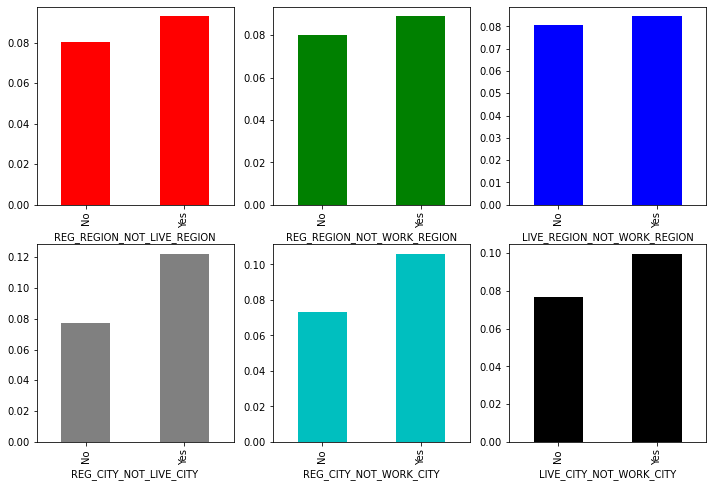

In [110]:
plt.figure(figsize = [12, 8])

plt.subplot(2,3,1)
df.groupby('REG_REGION_NOT_LIVE_REGION')['TARGET'].mean().plot.bar(color = 'r')

plt.subplot(2,3,2)
df.groupby('REG_REGION_NOT_WORK_REGION')['TARGET'].mean().plot.bar(color = 'g')

plt.subplot(2,3,3)
df.groupby('LIVE_REGION_NOT_WORK_REGION')['TARGET'].mean().plot.bar(color = 'b')

plt.subplot(2,3,4)
df.groupby('REG_CITY_NOT_LIVE_CITY')['TARGET'].mean().plot.bar(color = 'gray')

plt.subplot(2,3,5)
df.groupby('REG_CITY_NOT_WORK_CITY')['TARGET'].mean().plot.bar(color = 'c')

plt.subplot(2,3,6)
df.groupby('LIVE_CITY_NOT_WORK_CITY')['TARGET'].mean().plot.bar(color = 'k')

plt.show()


# subplots withrespect to regions and target variables. Obviously, it is safe to lend the loan who work in the same city 
# and current address match with permanent address

### Multivariate Analysis

In [111]:
df.dtypes

SK_ID_CURR                       object
TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_WORK_PHONE                  object
FLAG_CONT_MOBILE                 object


#### Education vs Gender vs Target 

In [112]:
res = pd.pivot_table(data = df, index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER', values = 'TARGET')
res

CODE_GENDER,F,M,XNA
NAME_EDUCATION_TYPE,,,
Academic degree,0.030000,0.000000,NaN
Higher education,0.048480,0.063932,0.0
Incomplete higher,0.080216,0.092161,0.0
Lower secondary,0.092601,0.134884,NaN
Secondary / secondary special,0.076750,0.113622,0.0


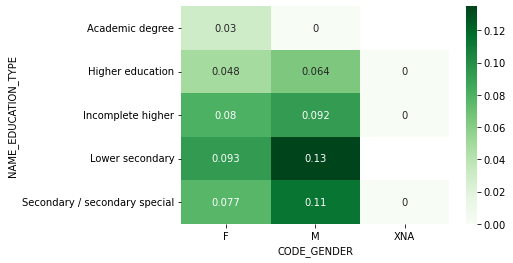

In [113]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# male and female have similar correlation w.r.t education. However, males are slightly being the best

#### Education vs Region rating vs Target

In [114]:
res = pd.pivot_table(data = df, index = 'NAME_EDUCATION_TYPE', columns = 'REGION_RATING_CLIENT', values = 'TARGET')
res

REGION_RATING_CLIENT,1,2,3
NAME_EDUCATION_TYPE,,,
Academic degree,0.025641,0.010204,0.037037
Higher education,0.033669,0.053201,0.075875
Incomplete higher,0.060302,0.080119,0.129975
Lower secondary,0.072874,0.104240,0.140731
Secondary / secondary special,0.055813,0.086593,0.120756


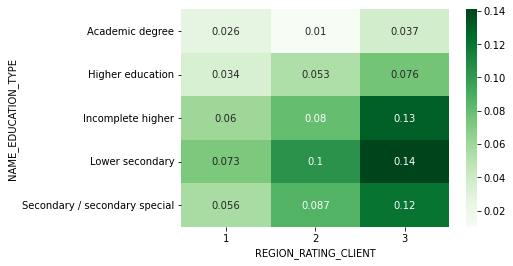

In [115]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# we can derive more insights from this heatmap. 
# 1. Academic degree people irrespective of the region are better to focus on 
# 2. Higher education people are better considering region rating of 1 and 2
# 3. secondary educated people who live in region rating 1 are also better to focus on
# 4. Its safe not to get into region rating 3 except for Academic degree people.

#### Income type vs Region rating vs Target

In [116]:
res = pd.pivot_table(data = df, index = 'NAME_INCOME_TYPE', columns = 'REGION_RATING_CLIENT', values = 'TARGET')
res

REGION_RATING_CLIENT,1,2,3
NAME_INCOME_TYPE,,,
Businessman,0.000000,0.000000,0.000000
Commercial associate,0.045845,0.077994,0.107126
Maternity leave,0.000000,0.333333,1.000000
Pensioner,0.037360,0.052338,0.068527
State servant,0.038212,0.052989,0.088105
Student,0.000000,0.000000,0.000000
Unemployed,0.333333,0.428571,0.200000
Working,0.059117,0.091386,0.130647


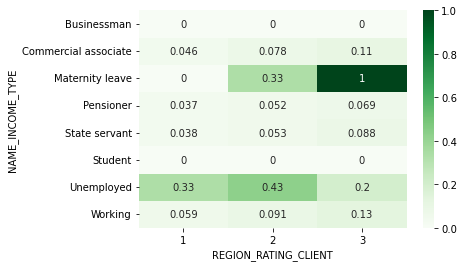

In [117]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# Having said that, state servant, pensioner and commercial assosciate being the best.

#### housing type vs Region rating vs Target

In [118]:
res = pd.pivot_table(data = df, index = 'NAME_HOUSING_TYPE', columns = 'REGION_RATING_CLIENT', values = 'TARGET')
res

REGION_RATING_CLIENT,1,2,3
NAME_HOUSING_TYPE,,,
Co-op apartment,0.069767,0.081680,0.073529
House / apartment,0.046514,0.076158,0.106746
Municipal apartment,0.055590,0.093638,0.113695
Office apartment,0.050193,0.066948,0.069414
Rented apartment,0.045603,0.119856,0.160546
With parents,0.069223,0.108571,0.168456


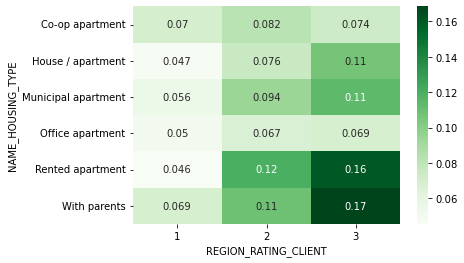

In [119]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# from all, it is quite clear that clients living in region rating - 3 have risk factors, whereas people living 
# in office appartment can be considered irrespective of the region

#### suite type vs Region rating vs Target

In [120]:
res = pd.pivot_table(data = df, index = 'NAME_TYPE_SUITE', columns = 'REGION_RATING_CLIENT', values = 'TARGET')
res

REGION_RATING_CLIENT,1,2,3
NAME_TYPE_SUITE,,,
Children,0.043321,0.072083,0.100209
Family,0.045468,0.073778,0.098691
Group of people,0.028571,0.093264,0.093023
Other_A,0.035461,0.098007,0.097561
Other_B,0.049751,0.098141,0.142857
"Spouse, partner",0.041257,0.076072,0.113122
Unaccompanied,0.048944,0.079761,0.112744


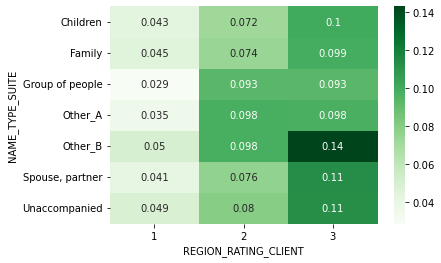

In [121]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# similar kind of analysis as previous ones, Irrespectuve of type of suite, clients living in region 1 can be considered

### Merging

#### merging the current data with the given previous data

In [122]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,VL,VL
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,L,L,L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,L,M,M


In [123]:
df1 = pd.read_csv('previous_application.csv')

In [124]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# removing some of the columns that arent necessary

drop_cols = ['SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START', 'NAME_SELLER_INDUSTRY', 'HOUR_APPR_PROCESS_START', \
             'NAME_SELLER_INDUSTRY']

In [126]:
df1 = df1.drop(drop_cols, axis = 1)

In [127]:
df1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1,0.0,...,35,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1,NaN,...,-1,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1,NaN,...,-1,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1,NaN,...,-1,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1,NaN,...,-1,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Analysing some of the variables

In [128]:
df1['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [129]:
df1['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

#### merging the data

In [130]:
# merging the 2 datasets based on SK_ID_CURR column and inner joint operation

df2 = pd.merge(df, df1, on = 'SK_ID_CURR', how = 'inner')

In [131]:
# display first 5 rows

df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,200,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,30,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [132]:
# to display columns upto 100

pd.set_option("display.max_columns",100)

In [133]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,No,No,No,No,No,No,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / seconda

### performing analysis

In [134]:
df2['NAME_CONTRACT_TYPE_x'].value_counts()

Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64

#### Contract Type vs Target

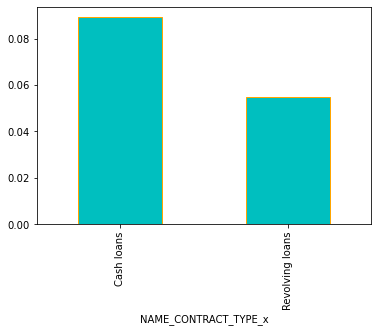

In [135]:
df2.groupby('NAME_CONTRACT_TYPE_x')['TARGET'].mean().plot.bar(color = 'c', edgecolor = 'orange')
plt.show()

# clients with revolving loans are considered as they had a privilage of repay and borrow the amount in previous loan
# and are more likely to repay the loan

#### Product Combination vs Target

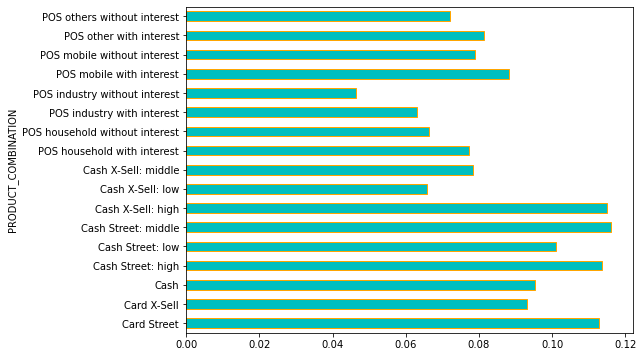

In [136]:
df2.groupby('PRODUCT_COMBINATION')['TARGET'].mean().plot.barh(color = 'c', edgecolor = 'orange', figsize = [8, 6])
plt.show()

#### Grouped Interest Level vs Target

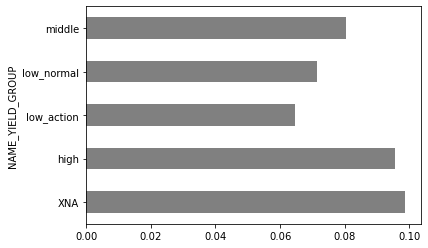

In [137]:
df2.groupby('NAME_YIELD_GROUP')['TARGET'].mean().plot.barh(color = 'gray')
plt.show()

# it makes sense that clients who got low interest rates in previous loan have made a timely repayment and is safe 
# to lend the loan considering the approved interest rate

In [138]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,No,No,No,No,No,No,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / seconda

#### Analysis of DAYS_TERMINATION variable

In [139]:
df2['DAYS_TERMINATION'].describe()

count    852595.000000
mean      82353.171672
std      153537.064274
min       -2874.000000
25%       -1269.000000
50%        -494.000000
75%         -42.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

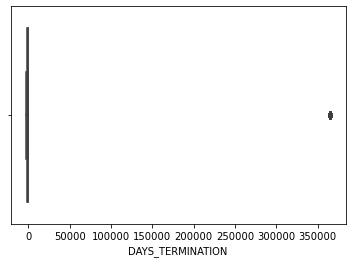

In [140]:
# checking outliers

sns.boxplot(df2['DAYS_TERMINATION'])
plt.show()

In [141]:
q1 = 445
q3 = 2504
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

upper_bound, lower_bound

(5592.5, -2643.5)

In [142]:
## capping outliers

df2['DAYS_TERMINATION'] = np.where(df2['DAYS_TERMINATION'] > 0, 0, df2['DAYS_TERMINATION'])

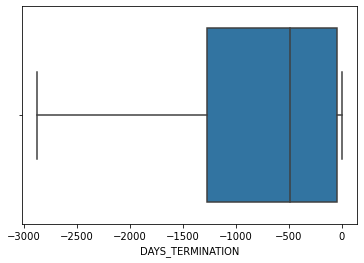

In [143]:
sns.boxplot(df2['DAYS_TERMINATION'])
plt.show()

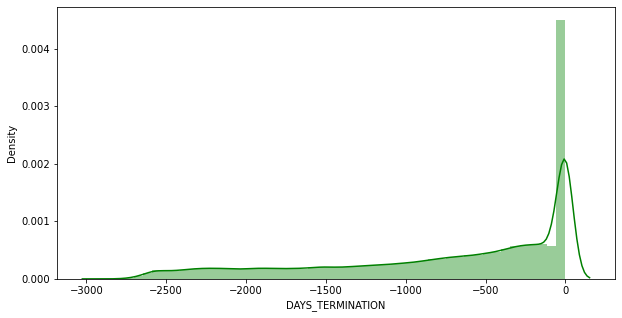

In [144]:
# plotting distribution of days_termination variable

plt.figure(figsize = [10, 5])

sns.distplot(df2['DAYS_TERMINATION'], color = 'g')

plt.show()

# How many days since the application ended. Values are always negative, except for '365243' which means that this application 
# still active (not completed yet)

#### Analysis of DAYS_FIRST_DUE variable

In [145]:
df2['DAYS_FIRST_DUE'].describe()

count    852595.000000
mean      13488.741567
std       71650.147146
min       -2892.000000
25%       -1630.000000
50%        -825.000000
75%        -408.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

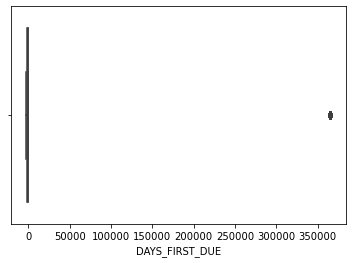

In [146]:
# checking outliers

sns.boxplot(df2['DAYS_FIRST_DUE'])
plt.show()

In [147]:
# handling outliers -- since every value should be less than 0 and value = 36523 means that due wasnt supposed to happen yet,
# focusing the range between negative value and 0

df2['DAYS_FIRST_DUE'] = np.where(df2['DAYS_FIRST_DUE'] > 0, 0, df2['DAYS_FIRST_DUE'])

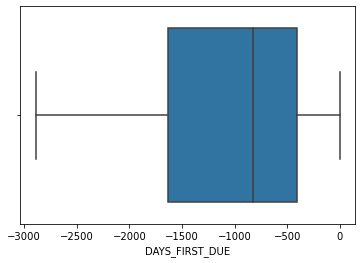

In [148]:
sns.boxplot(df2['DAYS_FIRST_DUE'])
plt.show()

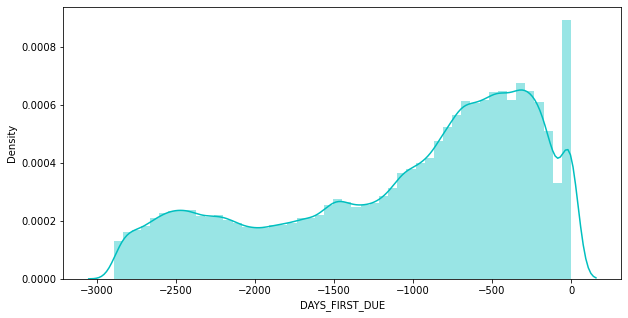

In [149]:
plt.figure(figsize = [10, 5])

sns.distplot(df2['DAYS_FIRST_DUE'], color = 'c')
plt.show()

#### Analysis of DAYS_LAST_DUE variable

In [150]:
df2['DAYS_LAST_DUE'].describe()

count    852595.000000
mean      76665.634755
std      149704.716371
min       -2889.000000
25%       -1316.000000
50%        -534.000000
75%         -73.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

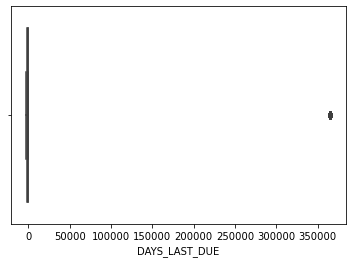

In [151]:
# values will be usually negative. value = 36523 means that he / she hasnt made the last due payment

sns.boxplot(df2['DAYS_LAST_DUE'])
plt.show()

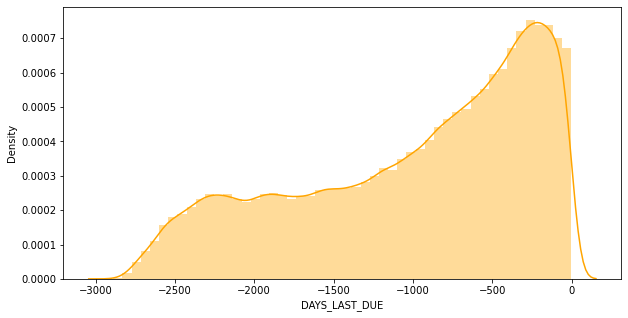

In [152]:
# plotting the distribution plot for values less than 365243

plt.figure(figsize=(10,5))

sns.distplot(df2[df2["DAYS_LAST_DUE"] < 365243]["DAYS_LAST_DUE"], color = 'orange')
plt.show()

#### Distribution of CNT_PAYMENT variable

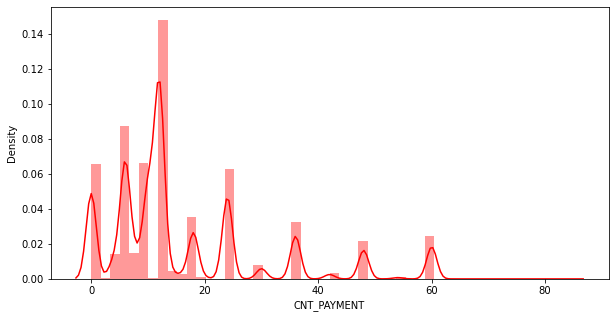

In [153]:
plt.figure(figsize=(10,5))

ax = sns.distplot(df2["CNT_PAYMENT"], color= 'r')
plt.show()

In [154]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income_Level,Credit_Level,Goods_Price_Level,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,No,No,No,No,No,No,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,L,L,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,No,No,No,No,No,No,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,VH,VH,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / seconda

#### Analysis of contract status vs target variable

In [155]:
df2['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

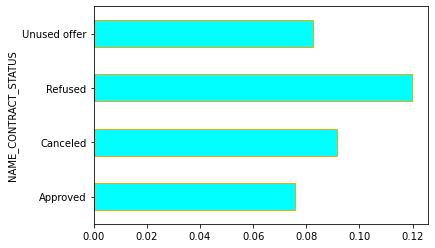

In [156]:
df2.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.barh(color = 'cyan', edgecolor = 'orange')
plt.show()

# by this, we can understand that there was a strong reason behind the company refusing the clients previous application
# and therefore a strong analysation should be done before lending the loan to those clients. 

#### Contract_type vs Income_level vs Target

In [157]:
res = pd.pivot_table(data = df2, index = 'NAME_CONTRACT_TYPE_y', columns = 'Income_Level', values = 'TARGET')
res

Income_Level,VL,L,M,H,VH
NAME_CONTRACT_TYPE_y,,,,,
Cash loans,0.092051,0.091671,0.099384,0.094129,0.080244
Consumer loans,0.073272,0.081480,0.084601,0.077721,0.067039
Revolving loans,0.106326,0.110061,0.116369,0.103156,0.088181
XNA,0.117647,0.240964,0.263158,0.204545,0.194444


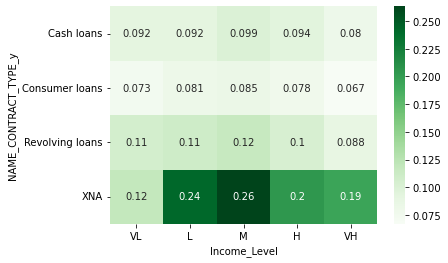

In [158]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# it is clear that, irrespective of income level, clients belonging to XNA category are likely to be defaulted and hence
# its better to avoid those

#### Contract_status vs Credit_level vs Target

In [159]:
res = pd.pivot_table(data = df2, index = 'NAME_CONTRACT_STATUS', columns = 'Credit_Level', values = 'TARGET')
res

Credit_Level,VL,L,M,H,VH
NAME_CONTRACT_STATUS,,,,,
Approved,0.064903,0.085607,0.092437,0.075044,0.062642
Canceled,0.083073,0.107397,0.107994,0.088261,0.068343
Refused,0.104628,0.137460,0.144769,0.112262,0.091635
Unused offer,0.070853,0.094393,0.101640,0.078761,0.066961


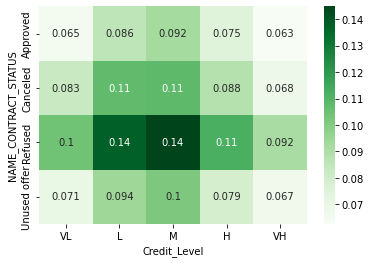

In [160]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()


#### Education_type vs Contract_status vs Target

In [161]:
res = pd.pivot_table(data = df2, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_CONTRACT_STATUS', values = 'TARGET')
res

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,0.014354,0.000000,0.010989,0.500000
Higher education,0.052282,0.064197,0.085401,0.066687
Incomplete higher,0.077649,0.101554,0.117082,0.099695
Lower secondary,0.095434,0.125847,0.139684,0.115152
Secondary / secondary special,0.082583,0.099024,0.130231,0.087992


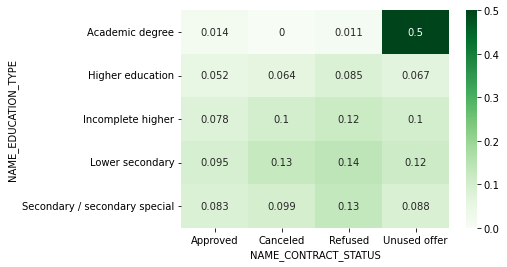

In [162]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

#### Income_type vs Contract_status vs Target

In [163]:
res = pd.pivot_table(data = df2, index = 'NAME_INCOME_TYPE', columns = 'NAME_CONTRACT_STATUS', values = 'TARGET')
res

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_INCOME_TYPE,,,,
Commercial associate,0.071559,0.085205,0.110931,0.066838
Maternity leave,1.000000,1.000000,1.000000,1.000000
Pensioner,0.052397,0.060807,0.078398,0.053015
State servant,0.056726,0.070349,0.086427,0.070487
Student,0.000000,0.000000,0.000000,NaN
Unemployed,0.455882,0.687500,0.657895,0.000000
Working,0.089059,0.111520,0.142226,0.093301


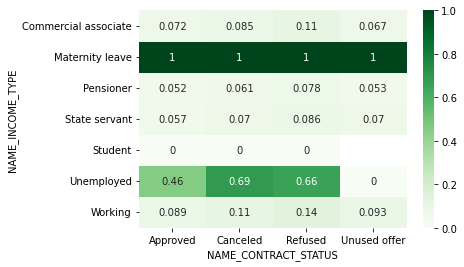

In [164]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()
 

#### Housing_type vs Contract_status vs Target

In [165]:
res = pd.pivot_table(data = df2, index = 'NAME_HOUSING_TYPE', columns = 'NAME_CONTRACT_STATUS', values = 'TARGET')
res

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_HOUSING_TYPE,,,,
Co-op apartment,0.072453,0.079491,0.147193,0.070288
House / apartment,0.073312,0.088643,0.116698,0.079340
Municipal apartment,0.083650,0.101760,0.131086,0.078348
Office apartment,0.062850,0.080478,0.096259,0.095506
Rented apartment,0.116117,0.141802,0.142003,0.147482
With parents,0.111615,0.139855,0.170406,0.116992


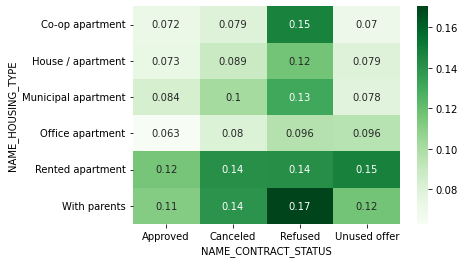

In [166]:
sns.heatmap(res, annot = True, cmap = 'Greens')
plt.show()

# Client who live in office appartment can be considered irrespective of their previous status of application. 
# Moreover, people who live in House or co-op appartment and if previous status shows approved or unused offer can be considered

###    -------------------------------------------------------x END OF ANALYSIS x-------------------------------------------------------------------